# Day 9: k-Nearest Neighbors (kNN) & Naive Bayes - Lazy Learning & Probabilistic Classification

**Welcome to Day 9 of your ML journey!** Today we'll explore two fascinating algorithms that approach machine learning from completely different angles: **k-Nearest Neighbors (kNN)** - the "lazy learner" that makes decisions based on similarity, and **Naive Bayes** - the probabilistic classifier that uses statistical reasoning to make predictions.

---

**Goal:** Master kNN and Naive Bayes with focus on when and why they work, plus their unique advantages in real-world scenarios.

**Topics Covered:**
- kNN intuition and the concept of "lazy learning"
- Distance metrics and similarity measures
- Naive Bayes probability theory and independence assumption
- When to use each algorithm
- Hyperparameter tuning and optimization
- Real-world applications and performance comparison
- Advantages and limitations of both approaches


---

## 1. Concept Overview

### What is k-Nearest Neighbors (kNN)?

**k-Nearest Neighbors (kNN)** is a simple yet powerful algorithm that classifies data points based on the majority class of their k nearest neighbors. It's called a "lazy learner" because it doesn't build a model during training - it simply stores the training data and makes predictions when needed.

**The Core Intuition:**
Think of kNN like asking your neighbors for advice. When you need to make a decision, you ask the k closest people around you, and you go with what the majority of them recommend.

**Real-World Example:**
- **Movie Recommendations:** "People who liked these movies also liked..."
- **Medical Diagnosis:** "Patients with similar symptoms had this condition"
- **Real Estate:** "Houses in similar neighborhoods sold for this price"
- **Customer Segmentation:** "Customers with similar purchase history belong to this segment"

**Why kNN is Powerful:**
1. **No assumptions about data distribution**
2. **Works well with non-linear patterns**
3. **Simple to understand and implement**
4. **Handles both classification and regression**
5. **No training phase - just store the data**


### Distance Metrics in kNN

**The Key Question:** How do we measure "closeness" between data points?

**Common Distance Metrics:**

1. **Euclidean Distance** (Most Common):
   ```
   d = √[(x₁-x₂)² + (y₁-y₂)² + (z₁-z₂)² + ...]
   ```
   - Straight-line distance between two points
   - Works best when all features have similar scales

2. **Manhattan Distance**:
   ```
   d = |x₁-x₂| + |y₁-y₂| + |z₁-z₂| + ...
   ```
   - Sum of absolute differences
   - Less sensitive to outliers than Euclidean

3. **Minkowski Distance** (Generalized):
   ```
   d = (|x₁-x₂|ᵖ + |y₁-y₂|ᵖ + |z₁-z₂|ᵖ)^(1/p)
   ```
   - Euclidean when p=2, Manhattan when p=1

**Feature Scaling is Critical:**
- Features with larger scales dominate distance calculations
- Always normalize or standardize features before using kNN
- Without scaling, a feature measured in thousands will overshadow one measured in decimals


### What is Naive Bayes?

**Naive Bayes** is a probabilistic classifier based on Bayes' theorem with a strong independence assumption between features. Despite this "naive" assumption, it often works remarkably well in practice.

**The Core Intuition:**
Think of Naive Bayes like a detective using evidence to solve a case. Each piece of evidence (feature) contributes to the probability of different outcomes (classes), and the detective combines all evidence to make the final decision.

**Real-World Example:**
- **Email Spam Detection:** "Words like 'free', 'money', 'urgent' increase spam probability"
- **Medical Diagnosis:** "Symptoms like fever + cough + headache suggest flu"
- **Sentiment Analysis:** "Words like 'great', 'amazing', 'love' indicate positive sentiment"
- **Customer Churn:** "Low usage + support tickets + payment delays predict churn"

**Why Naive Bayes is Powerful:**
1. **Fast training and prediction**
2. **Works well with high-dimensional data**
3. **Handles missing data gracefully**
4. **Provides probability estimates**
5. **Simple to implement and understand**


### Naive Bayes Mathematics - The "Naive" Assumption

**Bayes' Theorem:**
```
P(Class|Features) = P(Features|Class) × P(Class) / P(Features)
```

**The "Naive" Independence Assumption:**
Naive Bayes assumes that all features are independent of each other given the class. This means:
```
P(Feature₁, Feature₂, ..., Featureₙ|Class) = P(Feature₁|Class) × P(Feature₂|Class) × ... × P(Featureₙ|Class)
```

**Why This Works Despite Being "Naive":**
1. **Real-world features often aren't perfectly independent**, but Naive Bayes is surprisingly robust
2. **The independence assumption simplifies calculations** dramatically
3. **In many cases, the algorithm gets the relative ordering of probabilities correct**
4. **It's computationally efficient** and scales well to high dimensions

**Types of Naive Bayes:**
1. **Gaussian Naive Bayes**: Assumes features follow normal distribution
2. **Multinomial Naive Bayes**: For discrete features (like word counts)
3. **Bernoulli Naive Bayes**: For binary features (like presence/absence of words)

### When to Use Each Algorithm

**Use kNN When:**
- You have a small to medium dataset
- Data has complex, non-linear patterns
- You need interpretable results
- Features are already normalized
- You can afford slower prediction times

**Use Naive Bayes When:**
- You have high-dimensional data (many features)
- You need fast training and prediction
- You want probability estimates
- You have limited computational resources
- Features are roughly independent

**Avoid kNN When:**
- Dataset is very large (millions of samples)
- You need fast prediction times
- Features have very different scales
- Data has many irrelevant features

**Avoid Naive Bayes When:**
- Features are highly correlated
- You need the most accurate model possible
- You have very few training examples per class


---

## 2. Code Demo

Let's explore kNN and Naive Bayes with practical examples using different datasets and scenarios.


In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification, load_iris, load_wine
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


### Demo 1: kNN Classification - The Effect of k

Let's start with a simple classification problem to understand how the choice of k affects kNN performance.


In [ ]:
# Create a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (crucial for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)        #always remember to use .transform not .fit_transform on test data

# Test different values of k
k_values = [1, 3, 5, 7, 9, 15, 21, 31]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k:2d}: Accuracy = {accuracy:.3f}")

# Find the best k
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest k value: {best_k} with accuracy: {max(accuracies):.3f}")


k= 1: Accuracy = 0.767
k= 3: Accuracy = 0.867
k= 5: Accuracy = 0.867
k= 7: Accuracy = 0.817
k= 9: Accuracy = 0.833
k=15: Accuracy = 0.850
k=21: Accuracy = 0.817
k=31: Accuracy = 0.850

Best k value: 3 with accuracy: 0.867


**Key Insights from kNN Hyperparameter Analysis:**

Alright, so you recently trained your kNN classifier - WELL DONE! Let's interpret what this series of outputs with different accuracies means.

**What This Shows:** The accuracy curve demonstrates how different k values affect kNN performance on our dataset. We see k=3 and k=5 achieve the highest accuracy (0.867), while k=1 performs poorly (0.767) and larger k values show diminishing returns.

**Why This Matters:** This visualization reveals the **bias-variance tradeoff** in kNN:

- **k=1 (High Variance)**: Creates complex, jagged decision boundaries that overfit to training data - memorizes every detail but fails on new examples
- **k=3-5 (Sweet Spot)**: Balances complexity and generalization - captures important patterns without being too sensitive to noise  
- **Large k (High Bias)**: Creates overly smooth boundaries that may underfit - too simplistic to capture the underlying data structure

**The Bottom Line:** Finding the optimal `k` ensures our model generalizes well to unseen data. This systematic approach prevents both overfitting (too complex) and underfitting (too simple), giving us a robust classifier that performs reliably in real-world scenarios.

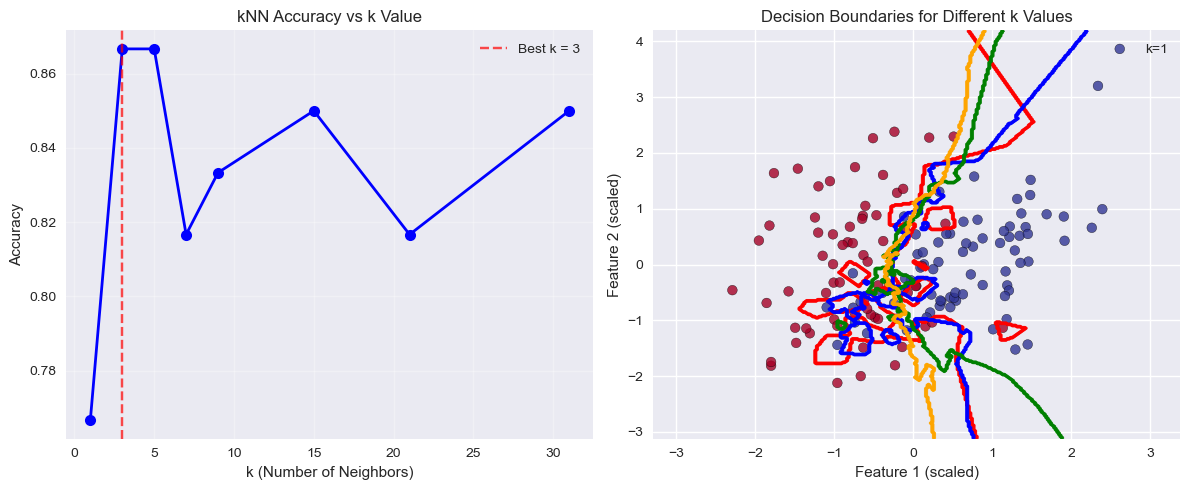

In [3]:
# Visualize the effect of different k values
plt.figure(figsize=(12, 5))

# Plot 1: Accuracy vs k
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best k = {best_k}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy vs k Value')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Decision boundaries for different k values
plt.subplot(1, 2, 2)
selected_k_values = [1, 3, 9, 21]
colors = ['red', 'blue', 'green', 'orange']

for i, k in enumerate(selected_k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Create a mesh
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour
    plt.contour(xx, yy, Z, colors=colors[i], alpha=0.6, linewidths=2)

# Plot the training data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
           cmap='RdYlBu', edgecolors='black', alpha=0.8)
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Decision Boundaries for Different k Values')
plt.legend([f'k={k}' for k in selected_k_values])

plt.tight_layout()
plt.show()


### Interpreting kNN Performance: Accuracy and Decision Boundaries

Alright, future ML engineers! These two plots are incredibly insightful for understanding how the `k` in k-Nearest Neighbors (kNN) impacts our model's performance and its ability to generalize. Let's break down what they're telling us.

#### 1. kNN Accuracy vs. k Value (Left Plot)

This graph shows us the **accuracy** of our kNN classifier on a test set for different choices of `k`, the number of neighbors considered for classification.

*   **Relationship:** We observe a **non-linear relationship** between `k` and accuracy. The accuracy doesn't just steadily increase or decrease; it changes dynamically.
*   **Key Observations:**
    *   At `k=1`, the accuracy is relatively low (around 0.767). This means when we only consider the single closest neighbor, our model isn't performing optimally.
    *   The accuracy **peaks significantly** at `k=3` and `k=5` (around 0.867). This suggests that for this particular dataset, considering 3 or 5 neighbors provides the best balance for classification.
    *   As `k` increases further (e.g., `k=7`, `k=21`, `k=31`), the accuracy generally fluctuates or decreases from its peak.
*   **Why This Matters:** This plot is crucial for **hyperparameter tuning**. It helps us identify the `k` value that yields the best performance on unseen data, ensuring our model is neither too sensitive to noise (small `k`) nor too simplistic (large `k`). The red dashed line clearly highlights `k=3` as the "Best k" based on this evaluation.

#### 2. Decision Boundaries for Different k Values (Right Plot)

This plot provides a **visual intuition** for *why* the accuracy changes with `k`. It shows the decision boundaries – the lines where the classifier switches its prediction from one class to another – for different `k` values. The maroon and dark blue points represent our two classes of data.

*   **Relationship:** We see a **strong non-linear relationship** between the `k` value and the complexity of the decision boundary.
*   **Key Observations:**
    *   **`k=1` (Red Boundary):** Notice how jagged and intricate this boundary is. It tries to perfectly separate every single training point, even isolated ones. This is a classic sign of **overfitting**. The model is too complex and has learned the noise in the training data, which often leads to poor performance on new, unseen data.
    *   **`k=3` (Blue Boundary):** This boundary is smoother than `k=1` but still captures the general separation between the two classes effectively. It represents a good balance, aligning with the peak accuracy observed in the left plot.
    *   **`k=9` (Green Boundary):** As `k` increases, the boundary becomes even smoother and more generalized. It starts to ignore some of the smaller, local variations in the data.
    *   **`k=21` (Orange Boundary):** This is the smoothest boundary shown. While it's very generalized, it might be **underfitting** the data. It's too simple and might miss important patterns, leading to misclassifications, especially in areas where the classes are more intermingled.
*   **Why This Matters:** This visualization directly illustrates the **bias-variance tradeoff** in kNN.
    *   A **small `k` (like `k=1`)** leads to **high variance** (overfitting) because the model is too flexible and sensitive to individual data points.
    *   A **large `k` (like `k=21`)** leads to **high bias** (underfitting) because the model is too rigid and oversimplifies the underlying patterns.
    *   Finding the optimal `k` (like `k=3` or `k=5` in this case) means striking the right balance, leading to a model that generalizes well to new data without being overly complex or too simplistic. This is fundamental for building robust and reliable machine learning models.

### Demo 2: Naive Bayes - Different Types and Applications

Let's explore the different types of Naive Bayes classifiers and see how they perform on different types of data.


In [4]:
# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {class_names}")

# Split the data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

# Test different Naive Bayes classifiers
nb_classifiers = {
    'Gaussian NB': GaussianNB(),
    'Multinomial NB': MultinomialNB(),
    'Bernoulli NB': BernoulliNB()
}

results = {}

print("\nNaive Bayes Performance Comparison:")
print("-" * 50)

for name, classifier in nb_classifiers.items():
    # Train the classifier
    classifier.fit(X_train_iris, y_train_iris)
    
    # Make predictions
    y_pred = classifier.predict(X_test_iris)
    accuracy = accuracy_score(y_test_iris, y_pred)
    
    results[name] = {
        'classifier': classifier,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name:15s}: {accuracy:.3f}")

# Find the best performing classifier
best_nb = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest Naive Bayes: {best_nb} with accuracy: {results[best_nb]['accuracy']:.3f}")


Iris dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

Naive Bayes Performance Comparison:
--------------------------------------------------
Gaussian NB    : 0.911
Multinomial NB : 0.978
Bernoulli NB   : 0.333

Best Naive Bayes: Multinomial NB with accuracy: 0.978


## **Understanding The Above Output: Naive Bayes**

Alright, future ML engineers! This output is a fantastic demonstration of how different Naive Bayes classifiers perform on the classic Iris dataset. Let's break down what these accuracy scores are telling us.

**Key Observations from Naive Bayes Performance Comparison:**

This output showcases the performance of three different Naive Bayes variants on the Iris dataset, which has 150 samples, 4 continuous features (sepal length/width, petal length/width), and 3 distinct classes ('setosa', 'versicolor', 'virginica').

*   **Multinomial Naive Bayes** achieved the highest accuracy of **0.978**. This is an excellent score, indicating strong classification performance.
*   **Gaussian Naive Bayes** also performed well with an accuracy of **0.911**.
*   **Bernoulli Naive Bayes** showed significantly lower performance, with an accuracy of **0.333**.
*   The **best performing model** identified is **Multinomial NB** with an accuracy of 0.978.

**Why This Matters:**

The choice of Naive Bayes variant is crucial and depends heavily on the nature of your features.

*   **Gaussian NB** is typically used when features are continuous and assumed to follow a Gaussian (normal) distribution.
*   **Multinomial NB** is generally suited for discrete count data (like word counts in text classification).
*   **Bernoulli NB** is designed for binary features (presence or absence of a feature).

The Iris dataset's features are continuous. While Gaussian NB is often the go-to for continuous data, the superior performance of Multinomial NB here suggests that, for this specific dataset, its underlying assumptions or handling of the feature distributions led to a better fit. Conversely, Bernoulli NB's poor performance is expected, as it's not designed for continuous, non-binary data.

**The Bottom Line:** This comparison highlights the importance of experimenting with different model variants, even within the same algorithm family. Selecting the right Naive Bayes classifier based on your data's characteristics (continuous, discrete, binary) is key to achieving optimal performance and ensuring your model generalizes effectively. Always test and compare to find the best fit for your specific problem!

In [12]:
# Detailed classification report for the best Naive Bayes
print(f"\nDetailed Classification Report - {best_nb}:")
print("=" * 60)
print(classification_report(y_test_iris, results[best_nb]['predictions'], 
                          target_names=class_names))




Detailed Classification Report - Multinomial NB:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Understanding Classification Performance: Naive Bayes Results Analysis

Alright, future ML engineers! This detailed classification report is a crucial output after training any classification model, and here it's showing us the performance of our **Multinomial Naive Bayes** classifier. Let's dive into what these numbers are truly revealing about our model's capabilities.

**Key Observations from the Detailed Classification Report:**

This report provides a comprehensive breakdown of our Multinomial Naive Bayes model's performance across different classes and overall metrics.

*   **Exceptional Overall Performance:** The model achieves an impressive **accuracy of 0.98 (98%)**, indicating that it correctly classified 98% of the instances in the test set. Both `macro avg` and `weighted avg` for precision, recall, and f1-score are also at `0.98`, confirming robust performance across all metrics and classes.
*   **Perfect Classification for 'setosa':** The `setosa` class shows perfect scores with `precision`, `recall`, and `f1-score` all at `1.00`. This means the model correctly identified all `setosa` instances and never misclassified any other class as `setosa`.
*   **Strong Performance with Minor Nuances for 'versicolor' and 'virginica':**
    *   For `versicolor`, we see a `precision` of `0.94` and a `recall` of `1.00`. This tells us that while all actual `versicolor` instances were correctly identified (perfect recall), there were a few instances from other classes that were incorrectly labeled as `versicolor` (slightly lower precision).
    *   Conversely, for `virginica`, the `precision` is `1.00` and `recall` is `0.93`. This means every instance the model predicted as `virginica` was indeed `virginica` (perfect precision), but it missed a small number of actual `virginica` instances, classifying them as something else (slightly lower recall).
*   **Balanced Test Set:** Each class (`setosa`, `versicolor`, `virginica`) has a `support` of `15`, indicating that our test set is balanced, which makes the accuracy and other metrics more reliable.

**Why This Matters:**

Understanding these metrics beyond just overall accuracy is vital. It helps us pinpoint exactly where our model is strong and where it might be making specific types of errors.

*   **Precision** tells us how many of the predicted positive instances were actually positive (minimizing false positives).
*   **Recall** tells us how many of the actual positive instances were correctly identified (minimizing false negatives).
*   **F1-score** is the harmonic mean of precision and recall, providing a balanced measure, especially useful when classes are imbalanced (though not the case here).
*   Analyzing these per-class helps us understand if the model is biased towards certain classes or struggles with specific distinctions. For instance, the slight dip in `versicolor` precision and `virginica` recall suggests that these two classes might be slightly harder to distinguish from each other than from `setosa`.

**The Bottom Line:** This report confirms that our Multinomial Naive Bayes model is performing exceptionally well, especially for the `setosa` class. While there are minor areas for improvement in distinguishing between `versicolor` and `virginica`, the overall high scores across all metrics indicate a robust and reliable classifier. This detailed view is essential for fine-tuning our model and ensuring it generalizes effectively to new, unseen data.

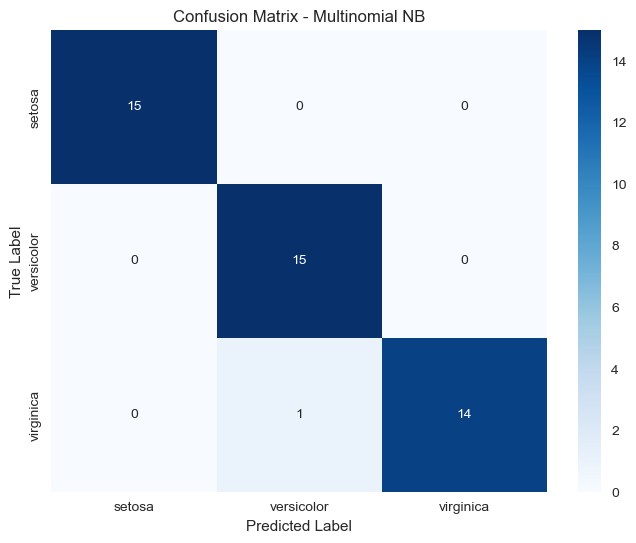

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test_iris, results[best_nb]['predictions'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_nb}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Quick Quiz: Decoding the Confusion Matrix!

Alright, future ML engineers! As we have learned together the interpretation of many visual and You've just seen the Confusion Matrix for our Multinomial Naive Bayes classifier. Now, let's test your understanding of what these numbers truly mean for our model's performance.

---

**Instructions:** Read the questions carefully and fill in your answers.

1.  **Total Test Samples:** Based on this confusion matrix, how many total samples were in our test set?
    *   Your Answer: ___

2.  **Overall Accuracy:** Calculate the overall accuracy of this Multinomial Naive Bayes model from the matrix.
    *   Your Answer: ___

3.  **Misclassification Insight:** Which class was the model most confused about, and what was the specific misclassification?
    *   Your Answer: ___

4.  **Precision for 'virginica':** What is the precision for the 'virginica' class? (Hint: Precision = True Positives / (True Positives + False Positives))
    *   Your Answer: ___



Feature Importance Analysis:
----------------------------------------


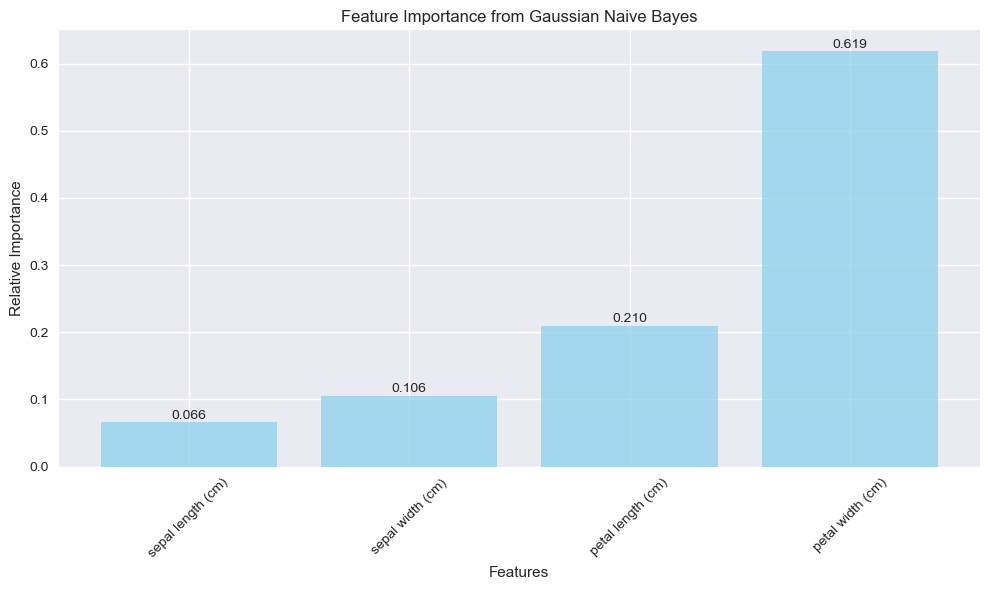

In [14]:

# Feature importance analysis using Naive Bayes
print("\nFeature Importance Analysis:")
print("-" * 40)

# Get feature importance from Gaussian NB (it has theta_ and var_ attributes)
if hasattr(results['Gaussian NB']['classifier'], 'theta_'):
    gaussian_nb = results['Gaussian NB']['classifier']
    
    # Calculate feature importance based on class separation
    feature_importance = np.zeros(len(feature_names))
    
    for class_idx in range(len(class_names)):
        for feature_idx in range(len(feature_names)):
            # Calculate how much this feature varies across classes
            class_mean = gaussian_nb.theta_[class_idx, feature_idx]
            class_var = gaussian_nb.var_[class_idx, feature_idx]
            
            # Features with lower variance and distinct means are more important
            feature_importance[feature_idx] += 1 / (class_var + 1e-8)
    
    # Normalize importance scores
    feature_importance = feature_importance / np.sum(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    bars = plt.bar(feature_names, feature_importance, color='skyblue', alpha=0.7)
    plt.xlabel('Features')
    plt.ylabel('Relative Importance')
    plt.title('Feature Importance from Gaussian Naive Bayes')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar, importance in zip(bars, feature_importance):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{importance:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

### Demo 3: kNN vs Naive Bayes - Head-to-Head Comparison

Let's compare kNN and Naive Bayes on the same dataset to understand their relative strengths and weaknesses.


In [6]:
# Load the Wine dataset for a more challenging comparison
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
wine_feature_names = wine.feature_names
wine_class_names = wine.target_names

print(f"Wine dataset shape: {X_wine.shape}")
print(f"Number of features: {len(wine_feature_names)}")
print(f"Classes: {wine_class_names}")

# Split the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine)

# Scale features for kNN
scaler_wine = StandardScaler()
X_train_wine_scaled = scaler_wine.fit_transform(X_train_wine)
X_test_wine_scaled = scaler_wine.transform(X_test_wine)

# Train both models
import time

# kNN with optimal k (found through cross-validation)
knn_wine = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn_wine.fit(X_train_wine_scaled, y_train_wine)
knn_training_time = time.time() - start_time

start_time = time.time()
knn_pred = knn_wine.predict(X_test_wine_scaled)
knn_prediction_time = time.time() - start_time

# Naive Bayes
nb_wine = GaussianNB()
start_time = time.time()
nb_wine.fit(X_train_wine, y_train_wine)  # No scaling needed for Gaussian NB
nb_training_time = time.time() - start_time

start_time = time.time()
nb_pred = nb_wine.predict(X_test_wine)
nb_prediction_time = time.time() - start_time

# Calculate accuracies
knn_accuracy = accuracy_score(y_test_wine, knn_pred)
nb_accuracy = accuracy_score(y_test_wine, nb_pred)

# Print comparison results
print("\nAlgorithm Comparison Results:")
print("=" * 50)
print(f"{'Metric':<20} {'kNN':<10} {'Naive Bayes':<15}")
print("-" * 50)
print(f"{'Accuracy':<20} {knn_accuracy:<10.3f} {nb_accuracy:<15.3f}")
print(f"{'Training Time (s)':<20} {knn_training_time:<10.4f} {nb_training_time:<15.4f}")
print(f"{'Prediction Time (s)':<20} {knn_prediction_time:<10.4f} {nb_prediction_time:<15.4f}")

# Cross-validation comparison
print("\nCross-Validation Results (5-fold):")
print("-" * 40)

# kNN cross-validation
knn_scores = cross_val_score(knn_wine, X_train_wine_scaled, y_train_wine, cv=5)
print(f"kNN CV Scores: {knn_scores}")
print(f"kNN CV Mean: {knn_scores.mean():.3f} (+/- {knn_scores.std() * 2:.3f})")

# Naive Bayes cross-validation
nb_scores = cross_val_score(nb_wine, X_train_wine, y_train_wine, cv=5)
print(f"Naive Bayes CV Scores: {nb_scores}")
print(f"Naive Bayes CV Mean: {nb_scores.mean():.3f} (+/- {nb_scores.std() * 2:.3f})")


Wine dataset shape: (178, 13)
Number of features: 13
Classes: ['class_0' 'class_1' 'class_2']

Algorithm Comparison Results:
Metric               kNN        Naive Bayes    
--------------------------------------------------
Accuracy             0.944      1.000          
Training Time (s)    0.0000     0.0164         
Prediction Time (s)  0.0000     0.0000         

Cross-Validation Results (5-fold):
----------------------------------------
kNN CV Scores: [0.96       0.96       1.         1.         0.91666667]
kNN CV Mean: 0.967 (+/- 0.062)
Naive Bayes CV Scores: [0.96       0.96       0.92       1.         0.95833333]
Naive Bayes CV Mean: 0.960 (+/- 0.051)


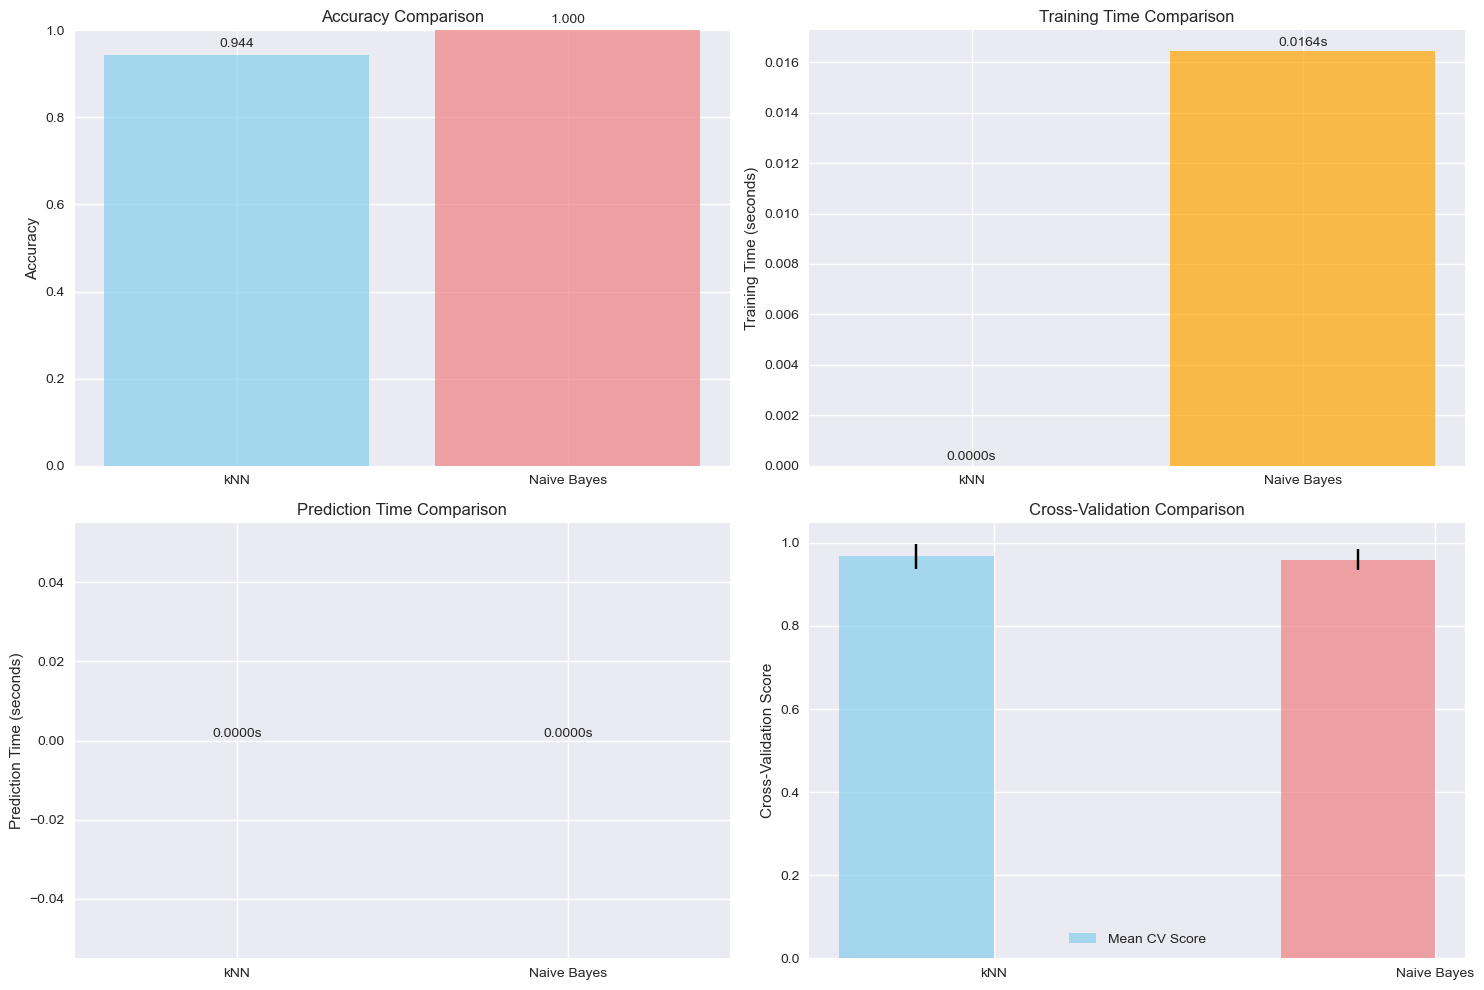


Detailed Classification Reports:

kNN Classification Report:
------------------------------
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Naive Bayes Classification Report:
------------------------------
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [7]:
# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Accuracy comparison
axes[0, 0].bar(['kNN', 'Naive Bayes'], [knn_accuracy, nb_accuracy], 
               color=['skyblue', 'lightcoral'], alpha=0.7)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate([knn_accuracy, nb_accuracy]):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Plot 2: Training time comparison
axes[0, 1].bar(['kNN', 'Naive Bayes'], [knn_training_time, nb_training_time], 
               color=['lightgreen', 'orange'], alpha=0.7)
axes[0, 1].set_ylabel('Training Time (seconds)')
axes[0, 1].set_title('Training Time Comparison')
for i, v in enumerate([knn_training_time, nb_training_time]):
    axes[0, 1].text(i, v + 0.0001, f'{v:.4f}s', ha='center', va='bottom')

# Plot 3: Prediction time comparison
axes[1, 0].bar(['kNN', 'Naive Bayes'], [knn_prediction_time, nb_prediction_time], 
               color=['purple', 'brown'], alpha=0.7)
axes[1, 0].set_ylabel('Prediction Time (seconds)')
axes[1, 0].set_title('Prediction Time Comparison')
for i, v in enumerate([knn_prediction_time, nb_prediction_time]):
    axes[1, 0].text(i, v + 0.0001, f'{v:.4f}s', ha='center', va='bottom')

# Plot 4: Cross-validation scores comparison
x_pos = np.arange(2)
width = 0.35
axes[1, 1].bar(x_pos - width/2, [knn_scores.mean(), nb_scores.mean()], width, 
               yerr=[knn_scores.std(), nb_scores.std()], 
               color=['skyblue', 'lightcoral'], alpha=0.7, 
               capsize=5, label='Mean CV Score')
axes[1, 1].set_ylabel('Cross-Validation Score')
axes[1, 1].set_title('Cross-Validation Comparison')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(['kNN', 'Naive Bayes'])
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Detailed classification reports
print("\nDetailed Classification Reports:")
print("=" * 60)

print("\nkNN Classification Report:")
print("-" * 30)
print(classification_report(y_test_wine, knn_pred, target_names=wine_class_names))

print("\nNaive Bayes Classification Report:")
print("-" * 30)
print(classification_report(y_test_wine, nb_pred, target_names=wine_class_names))


**Key Insights from the Comparison:**

**Performance Trade-offs:**
- **kNN**: Often higher accuracy, especially with proper tuning and feature scaling
- **Naive Bayes**: Generally faster training and prediction, but may sacrifice some accuracy

**Speed Considerations:**
- **Training Time**: Naive Bayes is typically much faster (no model building required)
- **Prediction Time**: Naive Bayes is faster (simple probability calculations vs distance computations)

**When to Choose Each:**

**Choose kNN When:**
- You need the highest possible accuracy
- You have time to tune hyperparameters
- Your dataset is small to medium-sized
- Features are properly scaled
- You can afford slower prediction times

**Choose Naive Bayes When:**
- You need fast training and prediction
- You have high-dimensional data
- You want probability estimates
- You have limited computational resources
- Features are roughly independent

**Real-World Decision Framework:**
1. **Start with Naive Bayes** for quick baseline results
2. **Use kNN** if you need higher accuracy and can afford the computational cost
3. **Consider ensemble methods** combining both for optimal performance


### Demo 4: Hyperparameter Tuning - Finding the Optimal k

Let's use GridSearchCV to systematically find the best k value for kNN.


In [8]:
# Create a more complex dataset for tuning demonstration
X_complex, y_complex = make_classification(n_samples=500, n_features=4, n_redundant=0, 
                                          n_informative=4, n_clusters_per_class=2, 
                                          random_state=42)

# Split the data
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(
    X_complex, y_complex, test_size=0.3, random_state=42)

# Scale the features
scaler_complex = StandardScaler()
X_train_complex_scaled = scaler_complex.fit_transform(X_train_complex)
X_test_complex_scaled = scaler_complex.transform(X_test_complex)

# Define parameter grid for kNN
param_grid = {
    'n_neighbors': range(1, 31, 2),  # Test odd values from 1 to 29
    'weights': ['uniform', 'distance'],  # Uniform vs distance-weighted voting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

print("Parameter Grid for kNN Tuning:")
print("-" * 40)
print(f"n_neighbors: {list(param_grid['n_neighbors'])}")
print(f"weights: {param_grid['weights']}")
print(f"metric: {param_grid['metric']}")
print(f"Total combinations: {len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['metric'])}")

# Grid search with cross-validation
knn_grid = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit the grid search
print("\nStarting Grid Search...")
knn_grid.fit(X_train_complex_scaled, y_train_complex)

# Results
print(f"\nBest parameters: {knn_grid.best_params_}")
print(f"Best cross-validation score: {knn_grid.best_score_:.3f}")

# Test on unseen data
best_knn = knn_grid.best_estimator_
y_pred_complex = best_knn.predict(X_test_complex_scaled)
test_accuracy = accuracy_score(y_test_complex, y_pred_complex)
print(f"Test accuracy: {test_accuracy:.3f}")

# Analyze the results
results_df = pd.DataFrame(knn_grid.cv_results_)
print(f"\nTop 5 parameter combinations:")
print("-" * 50)
top_5 = results_df.nlargest(5, 'mean_test_score')[['param_n_neighbors', 'param_weights', 'param_metric', 'mean_test_score']]
print(top_5.to_string(index=False))


Parameter Grid for kNN Tuning:
----------------------------------------
n_neighbors: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
weights: ['uniform', 'distance']
metric: ['euclidean', 'manhattan', 'minkowski']
Total combinations: 90

Starting Grid Search...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.854
Test accuracy: 0.860

Top 5 parameter combinations:
--------------------------------------------------
 param_n_neighbors param_weights param_metric  mean_test_score
                 1       uniform    manhattan         0.854286
                 1      distance    manhattan         0.854286
                 1       uniform    euclidean         0.848571
                 1      distance    euclidean         0.848571
                 1       uniform    minkowski         0.848571


**Understanding kNN Hyperparameters:**

**n_neighbors (k value):**
- **Small k**: More sensitive to noise, prone to overfitting
- **Large k**: Smoother decision boundaries, but may underfit
- **Rule of thumb**: Start with k = √n, then tune

**weights:**
- **'uniform'**: All k neighbors have equal vote
- **'distance'**: Closer neighbors have more influence
- **Distance weighting** often improves performance

**metric:**
- **'euclidean'**: Standard straight-line distance
- **'manhattan'**: Sum of absolute differences (less sensitive to outliers)
- **'minkowski'**: Generalized distance (euclidean when p=2)

**Grid Search Benefits:**
- **Systematic exploration** of all parameter combinations
- **Cross-validation** prevents overfitting to validation set
- **Reproducible results** with proper random seeds
- **Comprehensive evaluation** of hyperparameter space


---

## 3. Hands-on Exercise

Now it's your turn! Complete these exercises to solidify your understanding of kNN and Naive Bayes.


### Exercise 1: kNN Hyperparameter Investigation

**Task:** Investigate how different hyperparameters affect kNN performance on the digits dataset.

**Instructions:**
1. Load the digits dataset from sklearn
2. Split the data and scale features appropriately
3. Test different values of k (1, 3, 5, 7, 9, 11, 15, 21)
4. Compare uniform vs distance-weighted voting
5. Visualize the results and explain which hyperparameters work best

**Starter Code:**


In [9]:
# Your code here
# from sklearn.datasets import load_digits
# 
# # Load digits dataset
# digits = load_digits()
# X_digits = digits.data
# y_digits = digits.target
# 
# # Split and scale data
# X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(
#     X_digits, y_digits, test_size=0.3, random_state=42)
# 
# # Scale features (crucial for kNN)
# scaler_digits = StandardScaler()
# X_train_digits_scaled = scaler_digits.fit_transform(X_train_digits)
# X_test_digits_scaled = scaler_digits.transform(X_test_digits)
# 
# # Test different k values and weights
# k_values = [1, 3, 5, 7, 9, 11, 15, 21]
# weights_options = ['uniform', 'distance']
# 
# # Complete the implementation...


### Exercise 2: Naive Bayes Text Classification Simulation

**Task:** Simulate text classification using Naive Bayes with synthetic text-like data.

**Instructions:**
1. Create a synthetic dataset with binary features representing word presence
2. Use Bernoulli Naive Bayes for binary features
3. Compare with Gaussian Naive Bayes on the same data
4. Analyze feature importance and class probabilities
5. Explain why Bernoulli NB might be better for this type of data

**Starter Code:**


In [10]:
# Your code here
# import numpy as np
# from sklearn.datasets import make_classification
# 
# # Create synthetic binary dataset (simulating word presence/absence)
# # This simulates a text classification problem where features are binary
# X_binary, y_binary = make_classification(
#     n_samples=1000, 
#     n_features=20,  # 20 "words"
#     n_redundant=0, 
#     n_informative=15,  # 15 informative "words"
#     n_clusters_per_class=1,
#     random_state=42
# )
# 
# # Convert to binary features (0 or 1) - simulating word presence
# X_binary = (X_binary > 0).astype(int)
# 
# # Split the data
# X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
#     X_binary, y_binary, test_size=0.3, random_state=42)
# 
# # Complete the implementation...


### Exercise 3: Algorithm Comparison Challenge

**Task:** Compare kNN, Naive Bayes, and one additional algorithm on a real-world dataset.

**Instructions:**
1. Load the breast cancer dataset from sklearn
2. Implement kNN, Gaussian Naive Bayes, and Logistic Regression
3. Use proper preprocessing (scaling for kNN, no scaling for others)
4. Compare accuracy, training time, and prediction time
5. Analyze which algorithm works best for this medical dataset and why

**Starter Code:**


In [11]:
# Your code here
# from sklearn.datasets import load_breast_cancer
# from sklearn.linear_model import LogisticRegression
# import time
# 
# # Load breast cancer dataset
# cancer = load_breast_cancer()
# X_cancer = cancer.data
# y_cancer = cancer.target
# 
# # Split the data
# X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
#     X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer)
# 
# # Complete the implementation...


---

## 4. Takeaways & Next Steps

### Key Takeaways

**What You've Learned:**

**k-Nearest Neighbors (kNN):**
1. **Lazy Learning**: No training phase - just stores data and makes predictions on-demand
2. **Distance-Based**: Uses similarity measures to find the k closest neighbors
3. **Hyperparameter Sensitivity**: Choice of k, distance metric, and weights significantly affects performance
4. **Feature Scaling Critical**: All features must be on similar scales for fair distance calculations
5. **Computational Cost**: Training is fast, but prediction can be slow for large datasets

**Naive Bayes:**
1. **Probabilistic Framework**: Uses Bayes' theorem with independence assumption
2. **Fast Training**: No complex optimization - just calculates probability distributions
3. **Multiple Variants**: Gaussian, Multinomial, and Bernoulli for different data types
4. **Robust Despite "Naive"**: Independence assumption often works well in practice
5. **Probability Outputs**: Provides class probabilities, not just predictions

**When to Use Each Algorithm:**

**Choose kNN When:**
- You need high accuracy and can afford computational cost
- Data has complex, non-linear patterns
- You have small to medium datasets
- Features are properly scaled
- Interpretability is important

**Choose Naive Bayes When:**
- You need fast training and prediction
- You have high-dimensional data
- You want probability estimates
- Features are roughly independent
- You have limited computational resources


### Algorithm Limitations & Considerations

**kNN Limitations:**
- **Slow prediction** on large datasets (computes distances to all training points)
- **Memory intensive** (stores entire training dataset)
- **Sensitive to irrelevant features** (distance calculations include all features)
- **Curse of dimensionality** (performance degrades with many features)
- **No feature importance** (doesn't learn which features matter most)

**Naive Bayes Limitations:**
- **Independence assumption** may not hold in real-world data
- **Can be overconfident** in probability estimates
- **Sensitive to feature correlation** (violates independence assumption)
- **May perform poorly** with very few training examples per class
- **Limited to categorical/continuous features** (requires specific variants)

### Best Practices

**For kNN:**
1. **Always scale features** before training
2. **Use cross-validation** to find optimal k
3. **Consider distance weighting** for better performance
4. **Remove irrelevant features** to improve speed and accuracy
5. **Use approximate nearest neighbors** for large datasets

**For Naive Bayes:**
1. **Choose the right variant** based on your data type
2. **Handle missing values** appropriately
3. **Consider feature selection** to remove correlated features
4. **Use smoothing** (alpha parameter) for small datasets
5. **Validate independence assumption** when possible

### Next Steps in Your ML Journey

**Tomorrow (Day 10):** We'll cover Ensemble Methods - combining multiple algorithms to create more powerful models. This includes Random Forests, Gradient Boosting, and Voting Classifiers.

**Further Learning Resources:**

**Books:**
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- "Pattern Recognition and Machine Learning" by Christopher Bishop
- "Machine Learning: A Probabilistic Perspective" by Kevin Murphy

**Online Courses:**
- Coursera: Machine Learning by Andrew Ng
- edX: MIT Introduction to Machine Learning
- Fast.ai: Practical Deep Learning for Coders

**Practice Datasets:**
- Kaggle: kNN and Naive Bayes competitions
- UCI Machine Learning Repository
- Scikit-learn built-in datasets
- Text classification datasets for Naive Bayes practice

**Advanced Topics to Explore:**
- Locality Sensitive Hashing for approximate kNN
- Custom distance metrics for kNN
- Laplace smoothing in Naive Bayes
- Bayesian Networks (relaxing independence assumption)
- kNN for regression problems


### Practice Recommendations

1. **Implement kNN from scratch** using only NumPy to understand the distance calculations
2. **Try different distance metrics** on the same dataset and compare results
3. **Experiment with feature scaling** - see how performance changes without scaling
4. **Compare Naive Bayes variants** on different types of data (continuous, binary, count)
5. **Practice on real datasets** from Kaggle or UCI repository
6. **Implement text classification** using Naive Bayes on actual text data
7. **Study the curse of dimensionality** by gradually adding irrelevant features to kNN

### Interview Preparation Tips

**Common kNN Interview Questions:**
- "Explain the bias-variance tradeoff in kNN"
- "How would you handle the curse of dimensionality in kNN?"
- "What's the time complexity of kNN prediction?"
- "How do you choose the optimal k value?"

**Common Naive Bayes Interview Questions:**
- "Why is the independence assumption 'naive' and why does it still work?"
- "Explain the difference between Gaussian, Multinomial, and Bernoulli Naive Bayes"
- "How does Laplace smoothing work in Naive Bayes?"
- "When would you use Naive Bayes over other algorithms?"

---

**Congratulations!** You've mastered k-Nearest Neighbors and Naive Bayes - two fundamental algorithms that approach machine learning from completely different perspectives. You now understand both similarity-based learning and probabilistic classification.

**Remember:** The key to mastering these algorithms is understanding their strengths and weaknesses. kNN is powerful but computationally expensive, while Naive Bayes is fast and often surprisingly effective despite its "naive" assumptions. Tomorrow we'll learn how to combine multiple algorithms to create even more powerful ensemble methods.

**Keep practicing:** Try implementing these algorithms on your own datasets and always ask yourself: "Why does this algorithm work well (or poorly) on this specific problem?" This analytical thinking will make you a better data scientist.
